In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). **The prediction task is to determine whether a person makes over $50K a year.**  
**Description of fnlwgt (final weight)**   
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:  
1.	A single cell estimate of the population 16+ for each state.  
2.	Controls for Hispanic Origin by age and sex.  
3.	Controls by Race, age and sex.  
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.  


# Importing Dataset

In [2]:
df=pd.read_csv(r'E:\fliprobo technologies\projects\Evaluation projects\Evaluation projects 3rd\census_income.csv') 
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


we have to predict whether a person makes over $50K a year or not so it is a classification problem. our target column is Income 

# Exploratory Data analysis (EDA)

In [3]:
df.shape

(32560, 15)

the dataset contains 32560 rows and 15 columns.Out of which 1 is target variable(label,Dependent variable) and remaining 14 are independent variables(features,input variables)

In [4]:
# checking the column of the dataset and we are storeing it in the list 
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [5]:
# checking data types of the columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

We can see there are two format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: Workclass,Education,Martial_status,Occupation,Relationship,Race,Sex,Native_country,Income.

int64: It represents the integer variables. Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week is of this format.

In [6]:
# checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


all columns have equal number of count. so there are no null values present  

# checking the null values

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

there are no null values present

<AxesSubplot:>

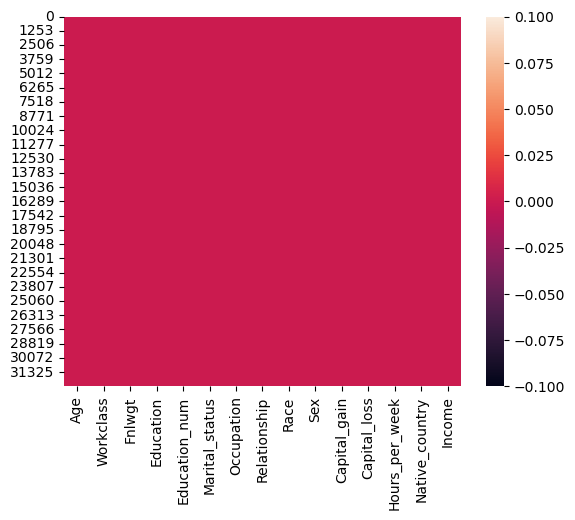

In [8]:
# lets visualize nulls using heatmap
sns.heatmap(df.isnull())

there are no null values present

# checking duplicates

In [9]:
df.duplicated().sum()

24

there are 24 duplicate values present

# Removing Duplicates

In [10]:
df1 = df.drop_duplicates()

In [11]:
print('Total rows before',df.shape)
print('Total rows after',df1.shape)
print("total duplicate rows removed-",df.shape[0]-df1.shape[0])

Total rows before (32560, 15)
Total rows after (32536, 15)
total duplicate rows removed- 24


No duplicate values are left

# checking value counts of each column

In [12]:
for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype

# Data visualization

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


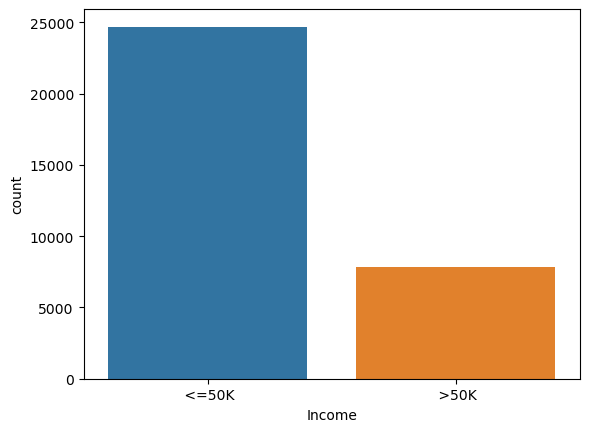

In [13]:
print(df1['Income'].value_counts())
sns.countplot(df1["Income"])
plt.show()

people having income less than or equal to 50k are more, than the people having income more than 50k

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


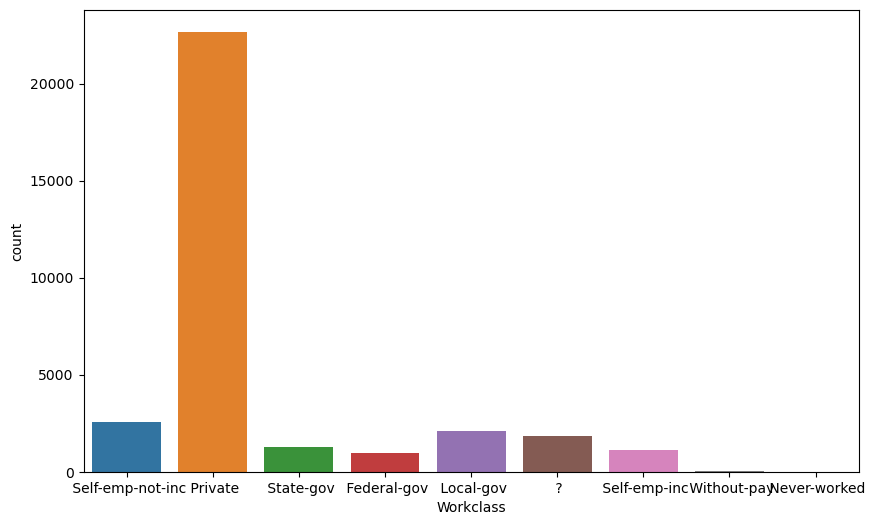

In [14]:
print(df1['Workclass'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df1["Workclass"])
plt.show()

private workclass is very much high than any other workclass, and never worked are very less, almost zero 

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


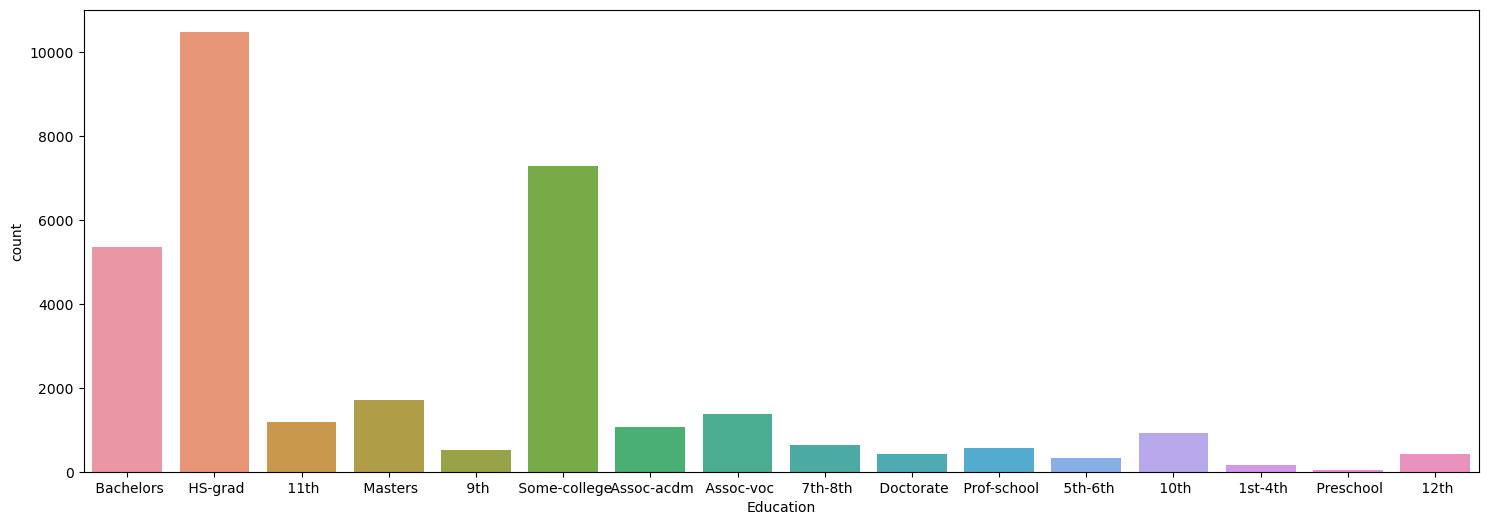

In [15]:
print(df1['Education'].value_counts())
plt.figure(figsize=(18,6))
sns.countplot(df1["Education"])
plt.show()

people who have done HS-grad,Bachelors,some-college are more, and people who have done Doctorate,prof-school,preschool,12th,11th,9th,masters,5-6th,7-8th are less

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


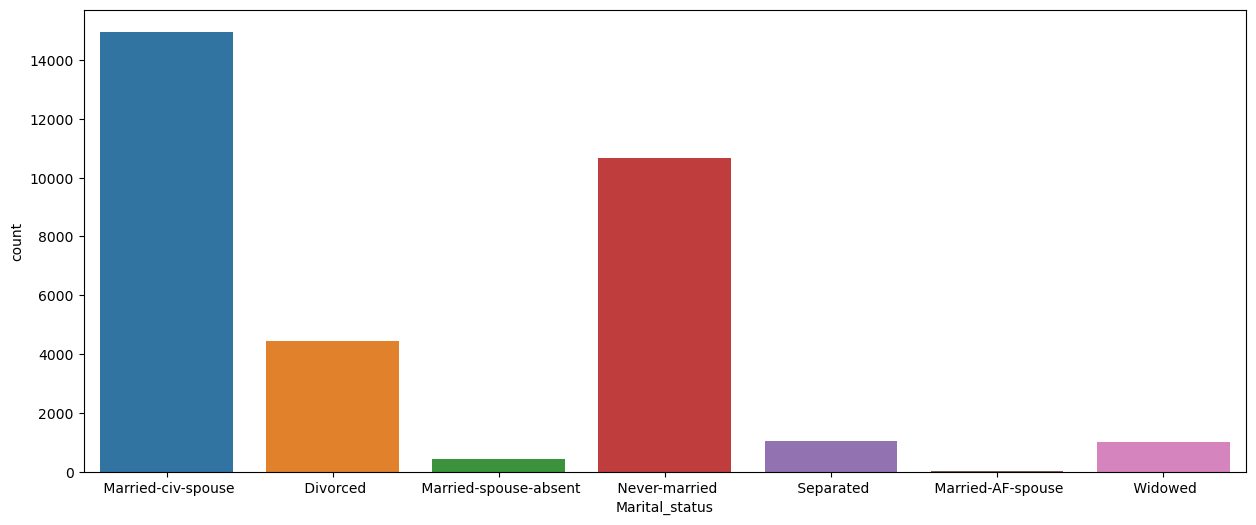

In [16]:
print(df1['Marital_status'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(df1["Marital_status"])
plt.show()

married-civ-spouse,Divorced and never-married are more in number. married-spouse-absent,seperated,married-af-spouse,widowed are less

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


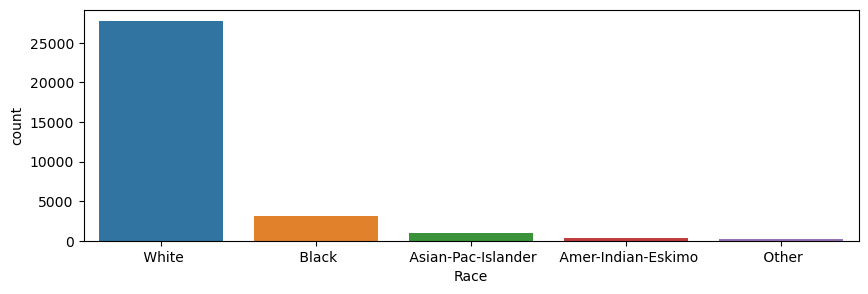

In [17]:
print(df1['Race'].value_counts())
plt.figure(figsize=(10,3))
sns.countplot(df1["Race"])
plt.show()

white people are more in number

# Checking for Outliers

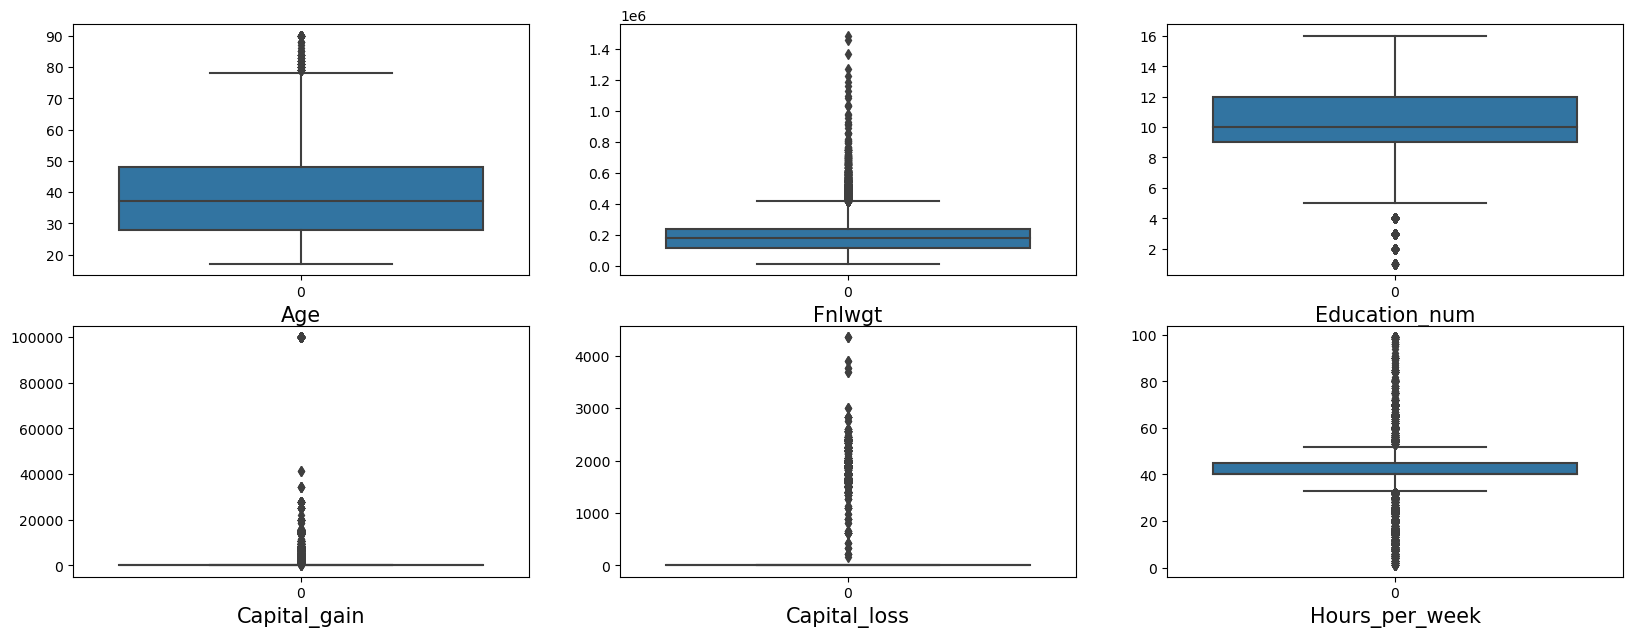

In [18]:
plt.figure(figsize=(20,15))
plot=1
for i in df1:
    if df1.dtypes[i] !='object':
        if plot<=20:
            plt.subplot(4,3,plot)
            sns.boxplot(data=df1[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()

outliers are present

# Encoding categorical columns

In [19]:
# here i am using Ordinal Encoder for encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


in our target column if income is less than or equal to 50k it is coded as 0 and if income is more than 50k it is coded as 1

# removing outliers

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape

(32536, 15)

In [21]:
print(np.where(z>3))

(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [22]:
df2=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)

(32536, 15)
(27399, 15)


In [23]:
loss=(df1.shape[0]-df2.shape[0])/df1.shape[0]*100
print(loss)

15.788664863535775


data loss is of 15.788%

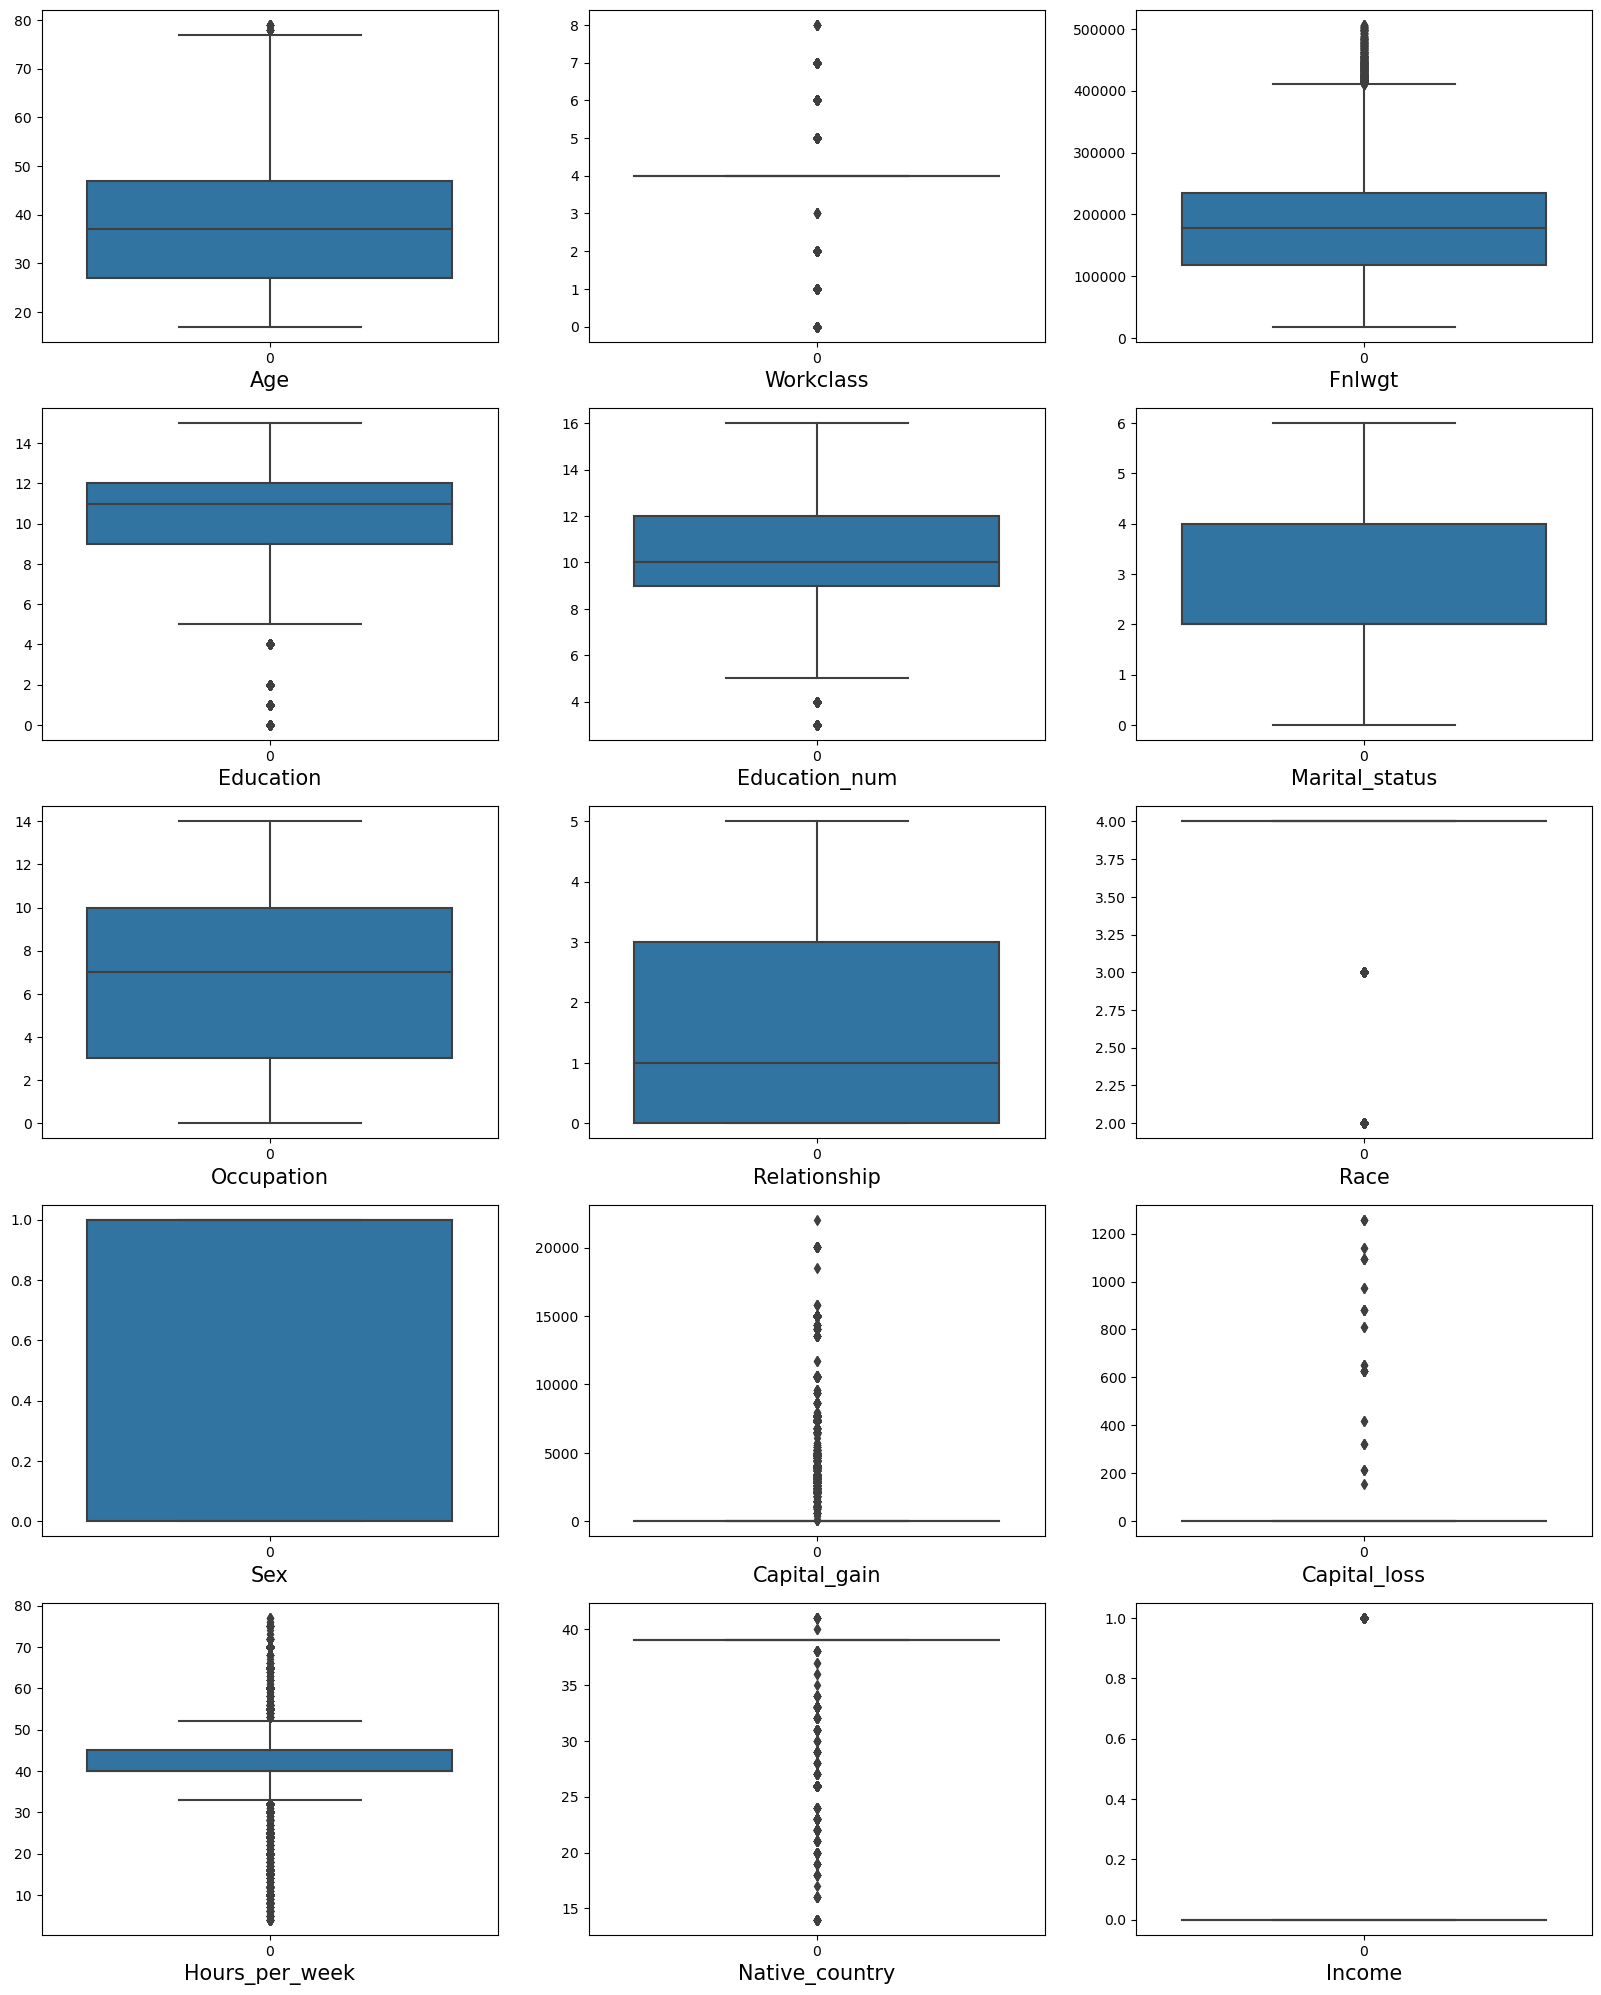

In [24]:
# checking outliers again
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df2:
    if plotnumber<=16:
        ac=plt.subplot(5,3,plotnumber)
        sns.boxplot(data=df2[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show() 

In [25]:
z=np.abs(zscore(df2))
z.shape


(27399, 15)

In [26]:
print(np.where(z<-3))

(array([], dtype=int64), array([], dtype=int64))


no outliers left

# checking distribution

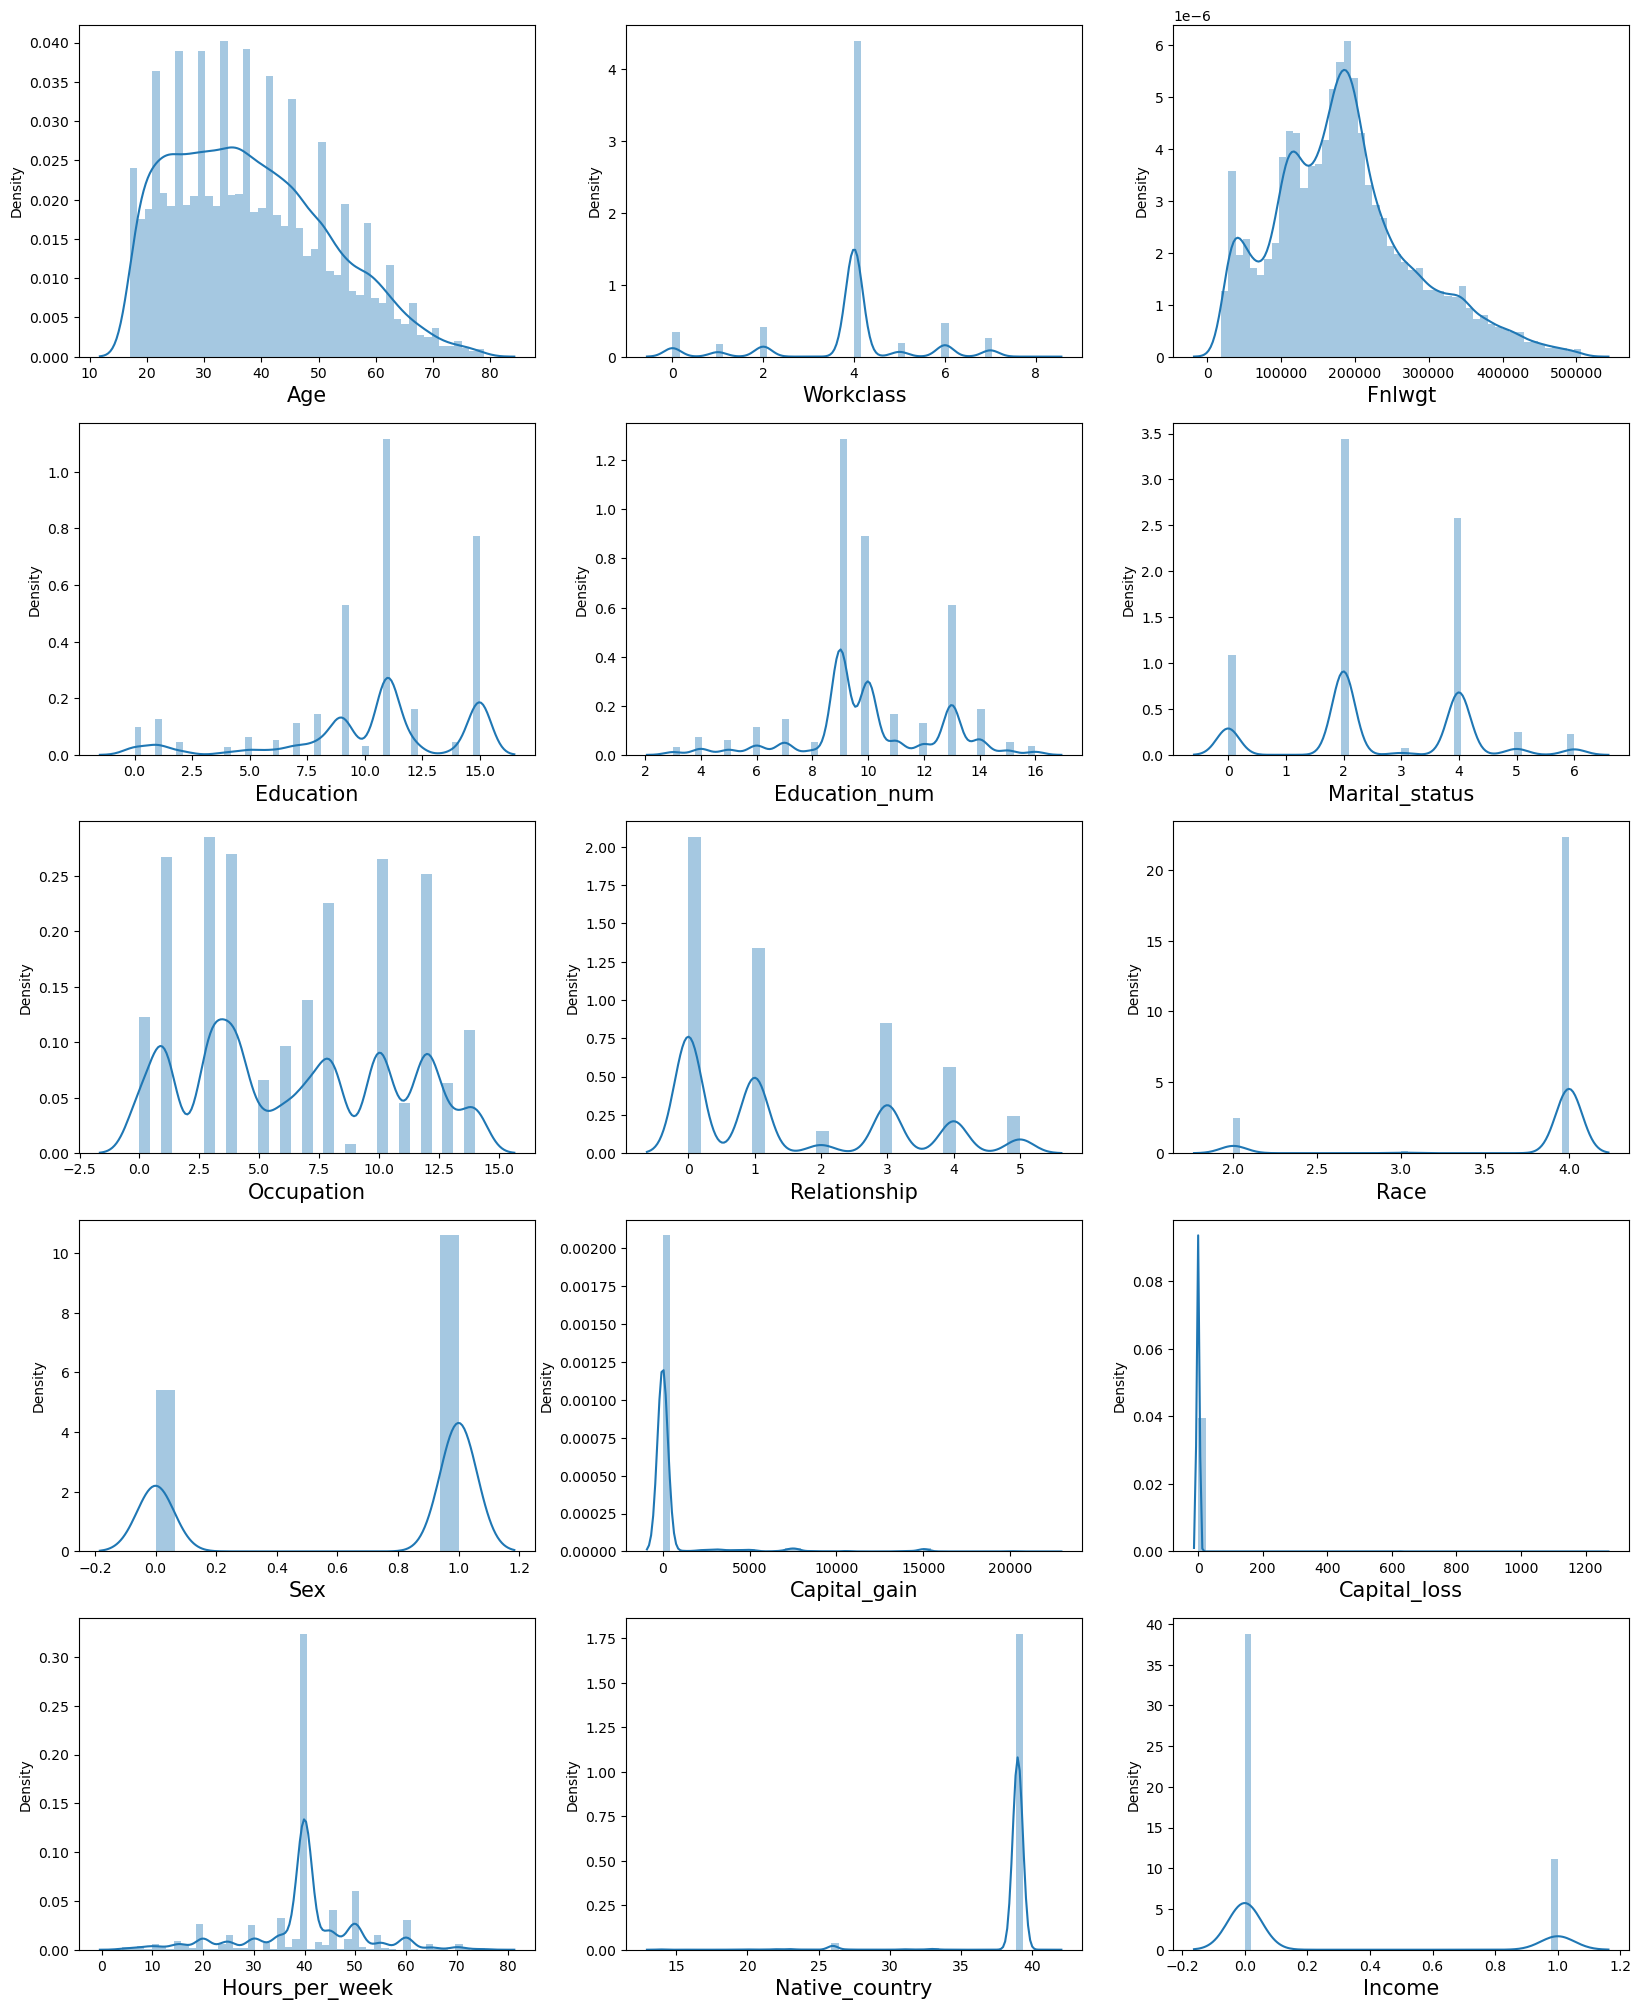

In [27]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df2:
    if plotnumber<=18:
        ac=plt.subplot(5,3,plotnumber)
        sns.distplot(df2[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show() 

# Checking for skewness

In [28]:
df2.skew()

Age                0.483537
Workclass         -0.737658
Fnlwgt             0.627331
Education         -0.957459
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.749953
Race              -2.592371
Sex               -0.684100
Capital_gain       4.933077
Capital_loss      29.316076
Hours_per_week    -0.357277
Native_country    -5.466051
Income             1.324408
dtype: float64

skewness present

In [29]:
# removing skewness again
for i in df2.columns:
    if i not in ["Income"]:
        if df2[i].skew()<0.5 and df2[i].skew()> -0.5:
            continue
        elif df2[i].skew() > 0.5 or df2[i].skew() < -0.5:
            df2[i] = np.sqrt(df2[i])

In [30]:
df2.skew()

Age                0.483537
Workclass         -2.294212
Fnlwgt            -0.112366
Education         -2.086595
Education_num     -0.143317
Marital_status    -0.043793
Occupation         0.130948
Relationship       0.118391
Race              -2.600265
Sex               -0.684100
Capital_gain       3.684172
Capital_loss      26.263107
Hours_per_week    -0.357277
Native_country    -5.743209
Income             1.324408
dtype: float64

# checking correlation

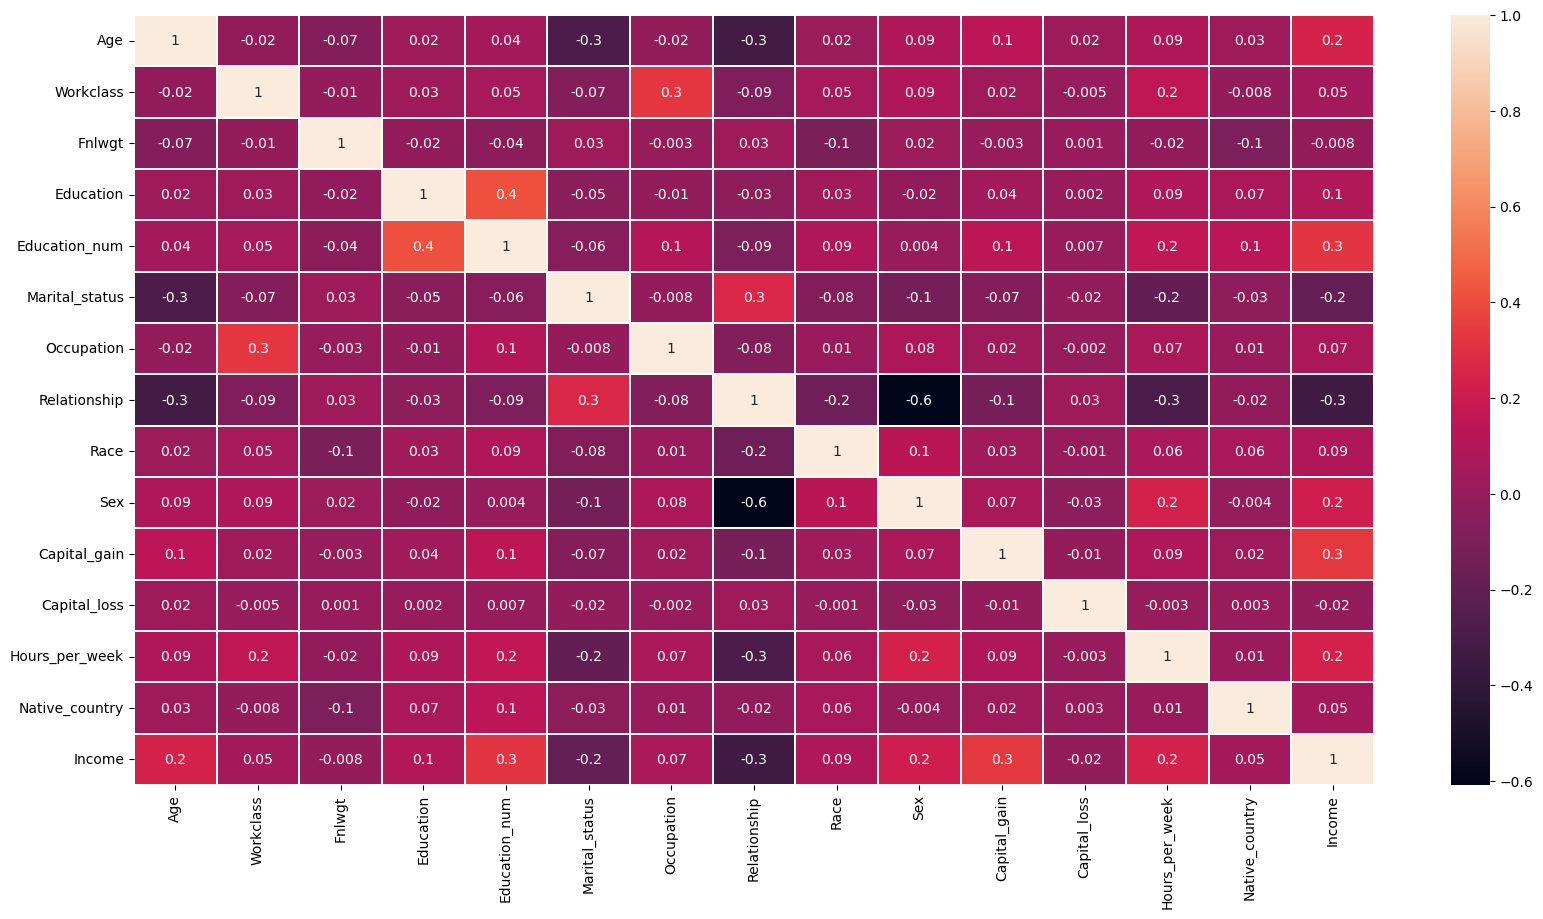

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True,linewidths=0.1,fmt=".1g")
plt.show()

there is no high correlation between features

# checking correlation with target

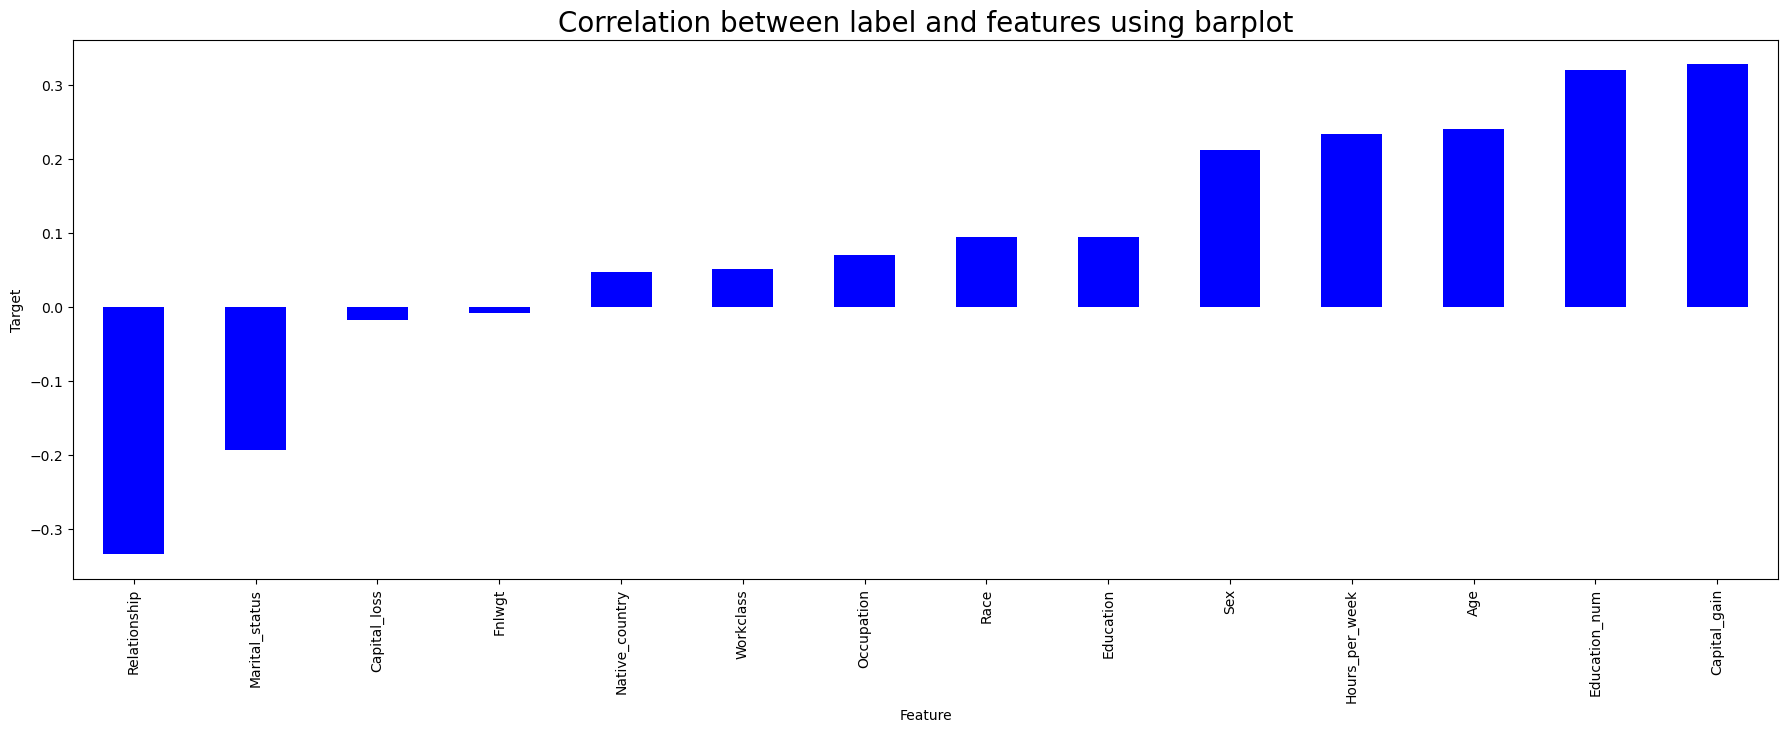

In [32]:
plt.figure(figsize=(22,7))
df2.corr()['Income'].sort_values(ascending=True).drop(['Income']).plot(kind='bar',color='blue')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

all features have correlation with the target except capital_loss,fnlwegt

# seperating features and label

In [33]:
x=df2.drop("Income",axis=1)
y=df2["Income"]

# Feature Scaling using Standard Scalarization

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.882431,1.030883,-1.124100,-0.125089,1.221822,-0.402967,-0.599341,-1.109541,0.343560,0.714844,-0.279647,-0.039524,-2.413051,0.190957
1,-0.012024,0.203342,0.422683,0.253164,-0.438440,-1.718613,-0.128201,0.122067,0.343560,0.714844,-0.279647,-0.039524,0.007920,0.190957
2,1.106045,0.203342,0.599621,-2.514373,-1.268572,-0.402967,-0.128201,-1.109541,-2.965856,0.714844,-0.279647,-0.039524,0.007920,0.190957
3,-0.086562,0.203342,1.030738,0.429346,1.636888,-0.402967,-0.599341,1.644419,0.343560,-1.398906,-0.279647,-0.039524,0.007920,0.190957
4,0.807893,0.203342,-0.141875,-0.782752,-2.098703,0.254856,0.342939,0.122067,-2.965856,-1.398906,-0.279647,-0.039524,-2.144054,-5.634921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,-0.831942,0.203342,0.800025,-0.548290,0.806756,-0.402967,1.520788,1.644419,0.343560,-1.398906,-0.279647,-0.039524,-0.171411,0.190957
27395,0.137051,0.203342,-0.206383,0.253164,-0.438440,-0.402967,0.107369,-1.109541,0.343560,0.714844,-0.279647,-0.039524,0.007920,0.190957
27396,1.478734,0.203342,-0.234092,0.253164,-0.438440,2.228324,-1.306051,1.353675,0.343560,-1.398906,-0.279647,-0.039524,0.007920,0.190957
27397,-1.204631,0.203342,0.286254,0.253164,-0.438440,0.912678,-1.306051,1.023667,0.343560,0.714844,-0.279647,-0.039524,-1.785392,0.190957


We have Scaled the data using standard Scalarization method to overcome the issue of biasness

# Checking variance inflation factor

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.220202,Age
1,1.147186,Workclass
2,1.026216,Fnlwgt
3,1.213074,Education
4,1.293228,Education_num
5,1.159944,Marital_status
6,1.138992,Occupation
7,1.916441,Relationship
8,1.050090,Race
9,1.655358,Sex


there is no multi collinearity

In [36]:
y.value_counts()

0.0    21263
1.0     6136
Name: Income, dtype: int64

here we can see the data is not balanced,since it is a classification problem we will balance the data using oversampling method

# Oversampling

In [37]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y =SM.fit_resample(x,y)

In [38]:
# Checking value count of target column
y.value_counts()

0.0    21263
1.0    21263
Name: Income, dtype: int64

after applying the SMOTE method now you can see, when i am checking the value count function, the values the count of both the classes are same.

# modelling

# finding the best random state


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0         # maximum accuracy
maxRS=0           # maximum random state
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)  
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Best accuracy is",maxAccu,"at random_state",maxRS)     

 Best accuracy is 0.906411663270105 at random_state 195


# creating train test split

In [40]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# classification Algorithms

In [41]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
# checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7773945759523436
[[4775 1541]
 [1299 5143]]
              precision    recall  f1-score   support

         0.0       0.79      0.76      0.77      6316
         1.0       0.77      0.80      0.78      6442

    accuracy                           0.78     12758
   macro avg       0.78      0.78      0.78     12758
weighted avg       0.78      0.78      0.78     12758



In [43]:
# checking accuracy for RandomForestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9031979934158959
[[5628  688]
 [ 547 5895]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      6316
         1.0       0.90      0.92      0.91      6442

    accuracy                           0.90     12758
   macro avg       0.90      0.90      0.90     12758
weighted avg       0.90      0.90      0.90     12758



In [44]:
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8331243141558238
[[4865 1451]
 [ 678 5764]]
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      6316
         1.0       0.80      0.89      0.84      6442

    accuracy                           0.83     12758
   macro avg       0.84      0.83      0.83     12758
weighted avg       0.84      0.83      0.83     12758



In [45]:
# checking accuracy for GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8694936510424831
[[5272 1044]
 [ 621 5821]]
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      6316
         1.0       0.85      0.90      0.87      6442

    accuracy                           0.87     12758
   macro avg       0.87      0.87      0.87     12758
weighted avg       0.87      0.87      0.87     12758



In [46]:
# checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8523279510895124
[[5236 1080]
 [ 804 5638]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      6316
         1.0       0.84      0.88      0.86      6442

    accuracy                           0.85     12758
   macro avg       0.85      0.85      0.85     12758
weighted avg       0.85      0.85      0.85     12758



In [47]:
# checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8923028687882113
[[5687  629]
 [ 745 5697]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      6316
         1.0       0.90      0.88      0.89      6442

    accuracy                           0.89     12758
   macro avg       0.89      0.89      0.89     12758
weighted avg       0.89      0.89      0.89     12758



In [48]:
# checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9089982755917856
[[5614  702]
 [ 459 5983]]
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      6316
         1.0       0.89      0.93      0.91      6442

    accuracy                           0.91     12758
   macro avg       0.91      0.91      0.91     12758
weighted avg       0.91      0.91      0.91     12758



In [49]:
# checking accuracy for k neighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8610283743533469
[[4922 1394]
 [ 379 6063]]
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      6316
         1.0       0.81      0.94      0.87      6442

    accuracy                           0.86     12758
   macro avg       0.87      0.86      0.86     12758
weighted avg       0.87      0.86      0.86     12758



In [50]:
# checking accuracy for DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8560902962846841
[[5380  936]
 [ 900 5542]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      6316
         1.0       0.86      0.86      0.86      6442

    accuracy                           0.86     12758
   macro avg       0.86      0.86      0.86     12758
weighted avg       0.86      0.86      0.86     12758



randomforest classifier gives more accuracy then other models

# cross valdation score

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
# checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.83000235 0.89018225 0.92639624 0.93109935 0.9308642 ]
0.9017088770758075
Difference between Accuracy score and cross validation score is- 0.0014891163400884144


In [53]:
# checking cv score for Logistic Regression
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predLR)-score1.mean())

[0.77263108 0.77507349 0.77836567 0.77295708 0.78259847]
0.7763251585870913
Difference between Accuracy score and cross validation score is- 0.0010694173652523453


In [54]:
# checking cv score for Gradient Boosting Classifier
score2=cross_val_score(GB,x,y)
print(score2)
print(score2.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predGB)-score2.mean())

[0.81377851 0.86125808 0.8824221  0.88536155 0.88042328]
0.8646487059727386
Difference between Accuracy score and cross validation score is- 0.004844945069744533


In [55]:
# checking cv score for Support vector machine Classifier
score3=cross_val_score(svc,x,y)
print(score3)
print(score3.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predsvc)-score3.mean())

[0.82812133 0.82727807 0.83115814 0.83433275 0.83962375]
0.832102807258645
Difference between Accuracy score and cross validation score is- 0.0010215068971787256


In [56]:
# checking cv score for Adaboost Classifier
score4=cross_val_score(ABC,x,y)
print(score4)
print(score4.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predABC)-score4.mean())

[0.80860569 0.8457378  0.85972957 0.86678424 0.86243386]
0.8486582338462056
Difference between Accuracy score and cross validation score is- 0.0036697172433067804


In [57]:
# checking cv score for Bagging Classifier
score5=cross_val_score(BC,x,y)
print(score5)
print(score5.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predBC)-score5.mean())

[0.79826005 0.87101705 0.91651969 0.92122281 0.92028219]
0.8854603583762086
Difference between Accuracy score and cross validation score is- 0.006842510412002678


In [58]:
# checking cv score for ExtraTrees Classifier
score6=cross_val_score(ET,x,y)
print(score6)
print(score6.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score6.mean())

[0.8687985  0.89935332 0.92639624 0.93215755 0.93004115]
0.9113493521811833
Difference between Accuracy score and cross validation score is- -0.002351076589397705


In [59]:
# checking cv score for knn
score7=cross_val_score(knn,x,y)
print(score7)
print(score7.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score7.mean())

[0.85316247 0.85232216 0.8691358  0.87278072 0.87113463]
0.8637071566731676
Difference between Accuracy score and cross validation score is- 0.045291118918618034


In [60]:
# checking cv score for DecisionTree Classifier
score8=cross_val_score(dt,x,y)
print(score8)
print(score8.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score8.mean())

[0.77592288 0.84585538 0.88653733 0.89335685 0.89029982]
0.8583944521369083
Difference between Accuracy score and cross validation score is- 0.05060382345487724


difference of accuracy in RandomForestClassifier is less than other models.so it is our best model because it gives more accuracy.

# Hyper parameter tuning

In [63]:
# RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini','entropy'],
           'random_state':[10,50,200,1000,None],
           'max_depth':[0,10,20,None],
           'n_jobs':[-2,-1,1,None],
           'n_estimators':[50,100,200,300]}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [64]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, None],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1, None],
                         'random_state': [10, 50, 200, 1000, None]})

In [65]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'n_estimators': 300,
 'n_jobs': 1,
 'random_state': None}

In [66]:
Final_Tuned_model=RandomForestClassifier(criterion= 'entropy',max_depth=None, n_estimators= 300,n_jobs= 1,random_state=None)
Final_Tuned_model.fit(x_train,y_train)
pred=Final_Tuned_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.41385797146889


after hyperparameter tuning model accuracy little bit has increased

In [68]:
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve

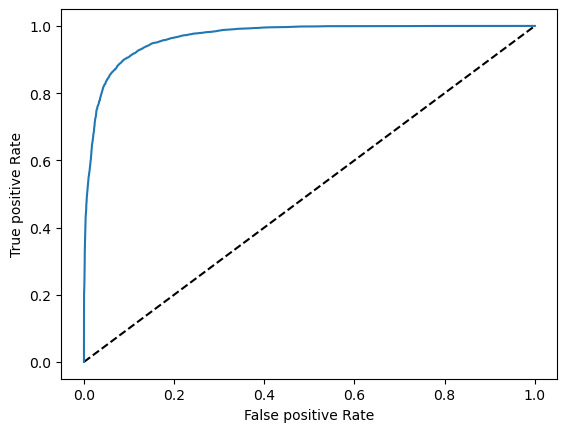

Auc Score: 
 0.9040092291345644


In [69]:
y_pred_probability=Final_Tuned_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_probability)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='(area=%0.2f)'%roc_auc)
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,Final_Tuned_model.predict(x_test))
print('Auc Score:','\n',auc_score)

# saving the model

In [70]:
import joblib
joblib.dump(Final_Tuned_model,"census_income.pkl")

['census_income.pkl']

# Reload the saved model

In [71]:
# lets load the saved model and get the prediction
model=joblib.load('census_income.pkl')

# predictions
prediction=model.predict(x_test)
prediction

array([0., 1., 0., ..., 1., 1., 0.])

# checking how the model is behaving

In [72]:
concl=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted_income","Original_income"])
concl

,0,1,2,3,4,5,6,7,8,9,...,12748,12749,12750,12751,12752,12753,12754,12755,12756,12757
Predicted_income,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
Original_income,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


1 represents income more than 50k, 0 represents income less than 50k